In [1]:
import urllib
import requests
from IPython.core.display import HTML
def css_styling():
    styles = requests.get("https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css")
    return HTML(styles.text)
css_styling()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams['animation.html'] = 'html5'

# Solving the Advection Equation

This notebook will numerically solve the advection equation:

$$\frac{\partial u}{\partial t} = -c\frac{\partial u}{\partial x}$$

subject to the initial condition $u(x, 0) = u_0$ on the domain $[0,L]$. Let's take the initial condition to be $u_0(x) = sin(\omega t)$.

In [3]:
nx = 41
Lx = 1.
dx = Lx/(nx-1)
x = np.linspace(0,Lx,nx)
ω = 2*np.pi
u0 = np.sin(ω*x)

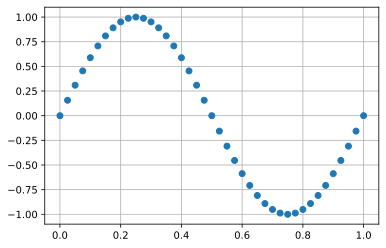

In [4]:
plt.plot(x,u0,'o')
plt.grid()

In [9]:
dt = 1e-3       # time scale
c = 10.         # wave speed
tend = 2.
cfl = c*dt/2./dx  # Courant-Friedrichs-Lewy number

sol = []
sol.append(u0)

t = 0.
while t < tend:
    un = sol[-1]
    unew = np.copy(un)
    unew[1:-1] = un[1:-1] - cfl*(un[2:]-un[:-2])
    # Periodic boundary conditions
    unew[-1] = un[-1] - cfl*(un[1]-un[-2])
    unew[0] = unew[-1]
    sol.append(unew)
    t += dt

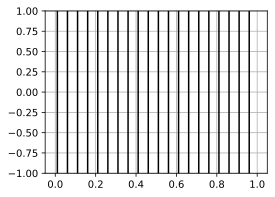

In [10]:
ims = []
fig = plt.figure(figsize=[4,3])
plt.grid()

i = 0
for solution in sol:
    if (i%10==0): # output frequency for frames  
        im = plt.plot(x,solution,'k-',animated=True)
        plt.ylim(-1,1)
        ims.append(im)
    i+=1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,
                                repeat_delay=1000)
# ani.save('ftcs.mp4')   
ani

The forward in time, centered in space scheme was unstable, unconditionally. The coefficient in the VonNeumann stability analysis is > 1, and therefore the solution grows. To remedy this, we will implement the forward in time, upwind in space, which uses the backward difference for the spatial scheme.

In [23]:
tend = 1.
c = 1.
dt = dx/c
cfl = c*dt/dx
sol = []
sol.append(u0)
t = 0.
while t < tend:
    un = sol[-1]
    unew = np.copy(un)
    unew[1:-1] = un[1:-1] - cfl*(un[1:-1]-un[:-2])
    # Periodic boundary conditions
    unew[-1] = un[-1] - cfl*(un[-1]-un[-2])
    unew[0] = unew[-1]
    sol.append(unew)
    t += dt

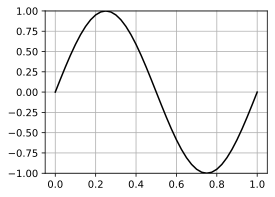

In [24]:
ims = []
fig = plt.figure(figsize=[4,3])
plt.grid()

i = 0
for solution in sol:
    if (i%2==0): # output frequency for frames  
        im = plt.plot(x,solution,'k-',animated=True)
        plt.ylim(-1,1)
        ims.append(im)
    i+=1
ani = animation.ArtistAnimation(fig, ims, interval=35, blit=True,
                                repeat_delay=1000)
# ani.save('ftus.mp4')   
ani